In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# plt.style.use(['science','notebook'])
plt.style.use(['science'])
import sys
sys.path.insert(0, '../src/pydftlj')
from eos import LJEOS, Calculate_VaporLiquidEquilibria
# Author: Elvis do A. Soares
# Github: @elvissoares
# Date: 2023-02-23

In [2]:
NA = 6.022e23
kB = 1.380649e-23 # J/K

In [3]:
# Reference: 10.1063/1.555898
exp_data = pd.read_csv('data/experimental/methane-saturation.dat',sep='\t')

In [4]:
exp_data.head()

,Temperature (K),Pressure (MPa),Liquid Density (kg/m3),Vapor Density (kg/m3)
0,90.694,0.011696,451.48,0.25074
1,92.000,0.013801,449.73,0.29197
2,94.000,0.017613,447.05,0.36530
3,96.000,0.022233,444.35,0.45238
4,98.000,0.027778,441.63,0.55488


Text(0, 0.5, 'Temperature (K)')

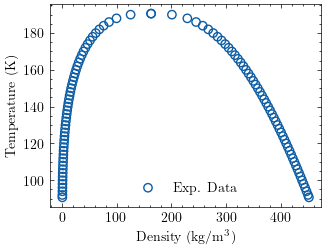

In [5]:
plt.scatter(exp_data['Vapor Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C0',facecolors='none',label='Exp. Data')
plt.scatter(exp_data['Liquid Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C0',facecolors='none')
plt.legend(loc='best')
plt.xlabel('Density (kg/m$^3$)')
plt.ylabel('Temperature (K)')

# PC-SAFT

In [6]:
# Gross, J., & Sadowski, G. (2001). Industrial & Engineering Chemistry Research, 40(4), 1244–1260.
fluid_molecule = 'CH4'
epsilonff = 150.03 # kelvin
sigmaff = 3.704 # angstrom
mff = 16.043 # g/mol

In [7]:
pcsaft_eos = LJEOS(sigma=sigmaff,epsilon=epsilonff)

[rhoc_pcsafteos,kTc_pcsafteos,rho_pcsafteos,kT_pcsafteos] = Calculate_VaporLiquidEquilibria(pcsaft_eos,kTmin=0.62)
p_pcsafteos = np.array([pcsaft_eos.p(rho_pcsafteos[i],kT_pcsafteos[i]) for i in range(rho_pcsafteos[rho_pcsafteos<rhoc_pcsafteos].size)])

In [8]:
rhoc_pcsafteos,kTc_pcsafteos

(0.00621833454743313, 197.21442104968287)

In [9]:
rhoc_pcsafteos*1e-3*mff/(NA*1e-30)

165.6604801469108

## TraPPE

In [10]:
# M.G. Martin, and J.I. Siepmann, J. Phys. Chem. B 102, 2569-2577 (1998).
fluid_molecule = 'CH4'
epsilonff = 148 # kelvin
sigmaff = 3.73 # angstrom
mff = 16.043 # g/mol

In [11]:
trappeeos = LJEOS(sigma=sigmaff,epsilon=epsilonff)

[rhoc_trappeeos,kTc_trappeeos,rho_trappeeos,kT_trappeeos] = Calculate_VaporLiquidEquilibria(trappeeos,kTmin=0.62)
p_trappeeos = np.array([trappeeos.p(rho_trappeeos[i],kT_trappeeos[i]) for i in range(rho_trappeeos[rho_trappeeos<rhoc_trappeeos].size)])

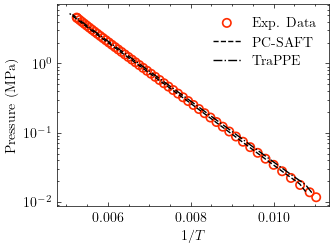

In [12]:
plt.scatter(1.0/exp_data['Temperature (K)'],exp_data['Pressure (MPa)'],marker='o',edgecolors='C3',facecolors='none',linewidth=1.2,label='Exp. Data')
plt.plot(1.0/kT_pcsafteos[rho_pcsafteos<rhoc_pcsafteos],1e-6*kB*p_pcsafteos/1e-30,linestyle='--',color='k',label='PC-SAFT')
plt.plot(1.0/kT_trappeeos[rho_trappeeos<rhoc_trappeeos],1e-6*kB*p_trappeeos/1e-30,linestyle='-.',color='k',label='TraPPE')
plt.yscale('log')
plt.xlabel(r'$1/T$')
plt.ylabel('Pressure (MPa)')
# plt.xlim(0.7,1.5)
# plt.ylim(1e-3,0.3)
plt.legend(loc='upper right',ncol=1)
# plt.savefig('../figures/pressure_lennardjones.png', dpi=200)
plt.show()

# Soft SAFT

In [13]:
ourworkeos = LJEOS(sigma=3.722,epsilon=147.3)

[rhoc_ourworkeos,kTc_ourworkeos,rho_ourworkeos,kT_ourworkeos] = Calculate_VaporLiquidEquilibria(ourworkeos,kTmin=0.62)
p_ourworkeos = np.array([ourworkeos.p(rho_ourworkeos[i],kT_ourworkeos[i]) for i in range(rho_ourworkeos[rho_ourworkeos<rhoc_ourworkeos].size)])

# Comparison of Parameters

(100.0, 600.0)

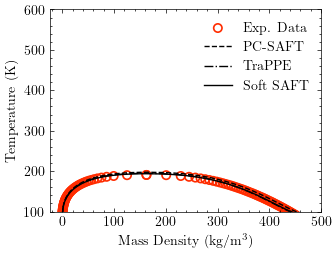

In [14]:
plt.scatter(exp_data['Vapor Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C3',facecolors='none',linewidth=1.2,label='Exp. Data')
plt.scatter(exp_data['Liquid Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C3',facecolors='none',linewidth=1.2)
plt.plot(rho_pcsafteos*1e-3*mff/(NA*1e-30),kT_pcsafteos,linestyle='--',color='k',label='PC-SAFT')
plt.plot(rho_trappeeos*1e-3*mff/(NA*1e-30),kT_trappeeos,linestyle='-.',color='k',label='TraPPE')
plt.plot(rho_ourworkeos*1e-3*mff/(NA*1e-30),kT_ourworkeos,linestyle='-',color='k',label='Soft SAFT')

plt.legend(loc='best')
plt.xlabel('Mass Density (kg/m$^3$)')
plt.ylabel('Temperature (K)')
plt.ylim(100,600)
# plt.ylim(100,200)

In [37]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(exp_data['Vapor Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C3',facecolors='none',linewidth=1.2,label='Exp. Data')
plt.scatter(exp_data['Liquid Density (kg/m3)'],exp_data['Temperature (K)'],marker='o',edgecolors='C3',facecolors='none',linewidth=1.2)
plt.plot(rho_pcsafteos*1e-3*mff/(NA*1e-30),kT_pcsafteos,linestyle='--',color='k',label='PC-SAFT')
plt.plot(rho_trappeeos*1e-3*mff/(NA*1e-30),kT_trappeeos,linestyle='-',color='k',label='TraPPE')
# plt.plot(rho_ourworkeos*1e-3*mff/(NA*1e-30),kT_ourworkeos,linestyle='-',color='k',label='Soft SAFT')

plt.legend(loc='best',ncol=1,fontsize=8, frameon=True, framealpha=0.7)

plt.xlabel('Mass Density (kg/m$^3$)')
plt.ylabel('Temperature (K)')
# plt.ylim(100,600)
plt.ylim(100,200)
plt.savefig('vle-methane.pdf')
plt.close()

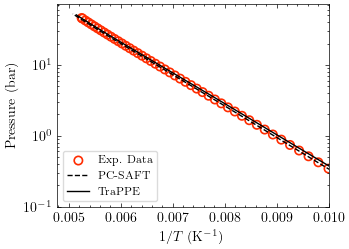

In [38]:
fig = plt.figure()
ax = fig.add_subplot()
plt.scatter(1.0/exp_data['Temperature (K)'],exp_data['Pressure (MPa)']*10,marker='o',edgecolors='C3',facecolors='none',linewidth=1.2,label='Exp. Data')
plt.plot(1.0/kT_pcsafteos[rho_pcsafteos<rhoc_pcsafteos],1e-6*kB*p_pcsafteos*10/1e-30,linestyle='--',color='k',label='PC-SAFT')
plt.plot(1.0/kT_trappeeos[rho_trappeeos<rhoc_trappeeos],1e-6*kB*p_trappeeos*10/1e-30,linestyle='-',color='k',label='TraPPE')
# plt.plot(1.0/kT_ourworkeos[rho_ourworkeos<rhoc_ourworkeos],1e-6*kB*p_ourworkeos/1e-30,linestyle='-',color='k',label='Soft SAFT')
plt.yscale('log')
plt.xlabel(r'$1/T$ (K$^{-1}$)')
plt.ylabel('Pressure (bar)')
plt.xlim(None,0.01)
plt.ylim(1e-1,None)
plt.legend(loc='lower left',ncol=1,fontsize=8, frameon=True, framealpha=0.7)
# plt.savefig('../figures/pressure_lennardjones.png', dpi=200)
plt.show()
fig.savefig('pressure-methane.pdf')